# Modeling Heart Disease

## Project Description

This project aims to predict heart disease using a dataset containing 14 clinical and demographic attributes, including age, cholesterol levels, blood pressure, chest pain type, and ECG results. Exploratory Data Analysis (EDA) was performed to understand patterns and relationships within the data. Multiple machine learning models—SVM, XGBoost, Decision Tree, and Logistic Regression—were trained and evaluated, with Logistic Regression selected as the final model due to its superior accuracy and interpretability. Feature analysis identified the most important factors contributing to heart disease risk, providing insights for early detection and intervention. The dataset was sourced from UCI Machine Learning Repository.

## General Objective

- To analyse and develop a predictive model using clinical and demographic indicators to predict whether a patient has heart disease.

### Specific Objective

1.Store and query the heart disease dataset using Python.

2.Clean, explore, and visualize the data.

3.Identify key risk factors and interpret insights.

4.Develop and evaluate a predictive machine learning model

#### Database Connection and Querying
- Connectiing to the database using SQL Alchemy

In [2]:

# Importing the necessary dependencies
import pyodbc #---> coonectivity interface that allows python and server to communicate 
from sqlalchemy import create_engine # ---> gets the engine function form the library
import pandas as pd # ---> converts the data to a dataframe import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# suppressing specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# checking for the pyodbc driver to be used in connectivity
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


In [5]:
# Creating a connection string that links the python notebook and the sql server
# Uisng windows Authentication(Tusted Connection)

server = 'DESKTOP-OGVCRV3'   #---> Computer's SQL server name
database = 'HeartDisease'     # ----> Dtabase I'm connecting to

engine = create_engine(
    f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
)


In [6]:
# loading the data into a  pandas data frame

H_disease = pd.read_sql("SELECT*FROM Heart_Disease", engine)
print("Dataset is successfully loaded!!")

Dataset is successfully loaded!!


#### Exploratory Data Analysis of the Heart Disease dataset

- We are going to explore, summarize and understand the data, before applying any machine learning or statistical modeling.

In [7]:
# loading the dataset into dataframe--> repeat

H_disease = pd.read_sql("SELECT*FROM Heart_Disease", engine)

print("Summary of the Heart Disease dataset: \n")

# Checking the first 5 rows of the dataset
print(H_disease.head())
print("**"*100)

# Checking the shape of the dataset
print(H_disease.shape)
print("**"*100)

# Checking the information of the dataset
print(H_disease.info())
print("**"*100)

# Listing the columns of the dataset
print(H_disease.columns)
print("**"*100)




Summary of the Heart Disease dataset: 

   age    sex  cp  trestbps  chol    fbs  restecg  thalach  exang  oldpeak  \
0   63   True   3       145   233   True        0      150  False      2.3   
1   37   True   2       130   250  False        1      187  False      3.5   
2   41  False   1       130   204  False        0      172  False      1.4   
3   56   True   1       120   236  False        1      178  False      0.8   
4   57  False   0       120   354  False        1      163   True      0.6   

   slope  ca  thal  target  
0      0   0     1    True  
1      0   0     2    True  
2      2   0     2    True  
3      2   0     2    True  
4      2   0     2    True  
********************************************************************************************************************************************************************************************************
(303, 14)
**********************************************************************************************************

- The dataset has 303 entries and 14 attributes.
- The dataset has 4 boolean type that will be converted back to categorical for EDA.


In [8]:
# Converting the boolean data type into categorical
H_disease['sex'] = H_disease['sex'].map({True:'Male', False: 'Female'})
H_disease['fbs'] = H_disease['fbs'].map({True: 1, False:0})
H_disease['exang'] = H_disease['exang'].map({True:1, False:0})
H_disease['target'] = H_disease['target'].map({True:1, False:0})


In [9]:
# Checking the info and statistical summary of the dataset

print("Info of the Heart dataset: \n")
print(H_disease.info())
print("**"*100)

print('Statistcal summary of the Heart_Disease dataset:\n')
print(H_disease.describe())

Info of the Heart dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB
None
*****************************************************************************************************************************************************************************

Statistical Summary Interpretation:

Age 
mean: 54   min: 29  max: 77 std: 9

- Most particpants are middle-aged adults, with a few older adults and even fewer younger ones. 

- The low standard deviation of 9 confirms that ages don't vary widely from the mean.

trestbps(resting blood pressure)
mean: 131  min: 94  max: 200  std: 17

- The standard deviation of 17 mm hg is moderate, but the maximum being 200 mm hg indicates potential outliers on the high end.

Chol(cholestrol)
mean: 246  min: 126   max: 546   std:  51

- The mean of 246 mg/dl which is slightly above the normal indicates that most participants have elevated cholestrol levels. 

- The high max(546 mg/dl) suggests few outliers.

- The standard deviation of 51 mg/dl shows moderate variability and could be due to the extreme high values.

thalach (maximum heart rate achieved)
mean: 149.6   min: 71  max: 202.  std: 22.9 

- Thalach is centered around 150 bpm, mostly within expected ranges for adults.

- The standard deviation of 22.9 bpm shows moderate spread, with possible low outliers but normal high values.


In [10]:
# Identifying the unique values  for categorcial column:

for col in H_disease.select_dtypes(include='object').columns:
    print(f"{col}: {H_disease[col].unique()}")
    print("*"*60)

# Counting the numebrs of the unique values
print(H_disease['sex'].value_counts())
print("*"*60)
  

sex: ['Male' 'Female']
************************************************************
sex
Male      207
Female     96
Name: count, dtype: int64
************************************************************


In [11]:
# Identifying the unique values for the classified columns

unique_cols= ['cp','fbs','restecg','exang','slope','thal','target','ca']

for col in unique_cols:
    print(f"Unique values in {col}: {H_disease[col].unique()}")
    print(f"Count of unique values in {col}: {H_disease[col].value_counts()}")
    print("*"*60, '\n')

Unique values in cp: [3 2 1 0]
Count of unique values in cp: cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
************************************************************ 

Unique values in fbs: [1 0]
Count of unique values in fbs: fbs
0    258
1     45
Name: count, dtype: int64
************************************************************ 

Unique values in restecg: [0 1 2]
Count of unique values in restecg: restecg
1    152
0    147
2      4
Name: count, dtype: int64
************************************************************ 

Unique values in exang: [0 1]
Count of unique values in exang: exang
0    204
1     99
Name: count, dtype: int64
************************************************************ 

Unique values in slope: [0 2 1]
Count of unique values in slope: slope
2    142
1    140
0     21
Name: count, dtype: int64
************************************************************ 

Unique values in thal: [1 2 3 0]
Count of unique values in thal: thal
2    166
3    1

From the dataset the columns have different classes:

#### cp(Chest pain/angina)- has 4 classes

● Value 0: typical angina

● Value 1: atypical angina

● Value 2: non-anginal pain

● Value 3: asymptomatic

#### fbs(fasting blood sugar > 120 mg/dl) -has 2 classes

● 1 = true

● 0 = false

#### restecg(resting electrocardiographic) - has 3 classes

● Value 0: normal

● Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

● Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### exang(exercise induced angina) - has 2 classes

● 1 = True

● 0 = False

#### slope - (shows the peak exercise ST segment) has 3 classes
● Value 0: upsloping

● Value 1: flat

● Value 2: downsloping

#### thal- has 3 classes ( The 0 indicates error which will be treated as NaN later)

● 1 = fixed defect

● 2 = normal

● 3 = reversable defect

#### target - has 2 classes

● 0 = no disease

● 1 = disease

#### ca - has (0-3) number of major vessels colored by fluoroscopy. 

- Four(4) recorded implies an implausible value which will be treated as NaN later.





In [12]:
# checking for missing values in the dataset
H_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- The dataset shows no missing values detected.


In [13]:
# importing numpy dependancy
import numpy as np

# replacing the Zero values in thal and ca with NaN as they are errors.
H_disease['thal'] = H_disease['thal'].replace(0,np.nan)
H_disease['ca'] = H_disease['ca']. replace(4,np.nan)

In [14]:
# rechecking for missing values
H_disease.isnull().sum()

print(f"The missing values in:\n {H_disease.isnull().sum()}\n")

print("*The missing values will be imputed before doing ML.")

The missing values in:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

*The missing values will be imputed before doing ML.


### Visualization Section

Objective:

- To explore patterns and relationships between clinical and demographic factors and heart disease risk using visualizations, in order to identify potential trends, correlations, and insights for further analysis.

1. Univariate Analysis

- Analyses one feature at a time.

In [15]:
# Importing the necessary dependencies

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


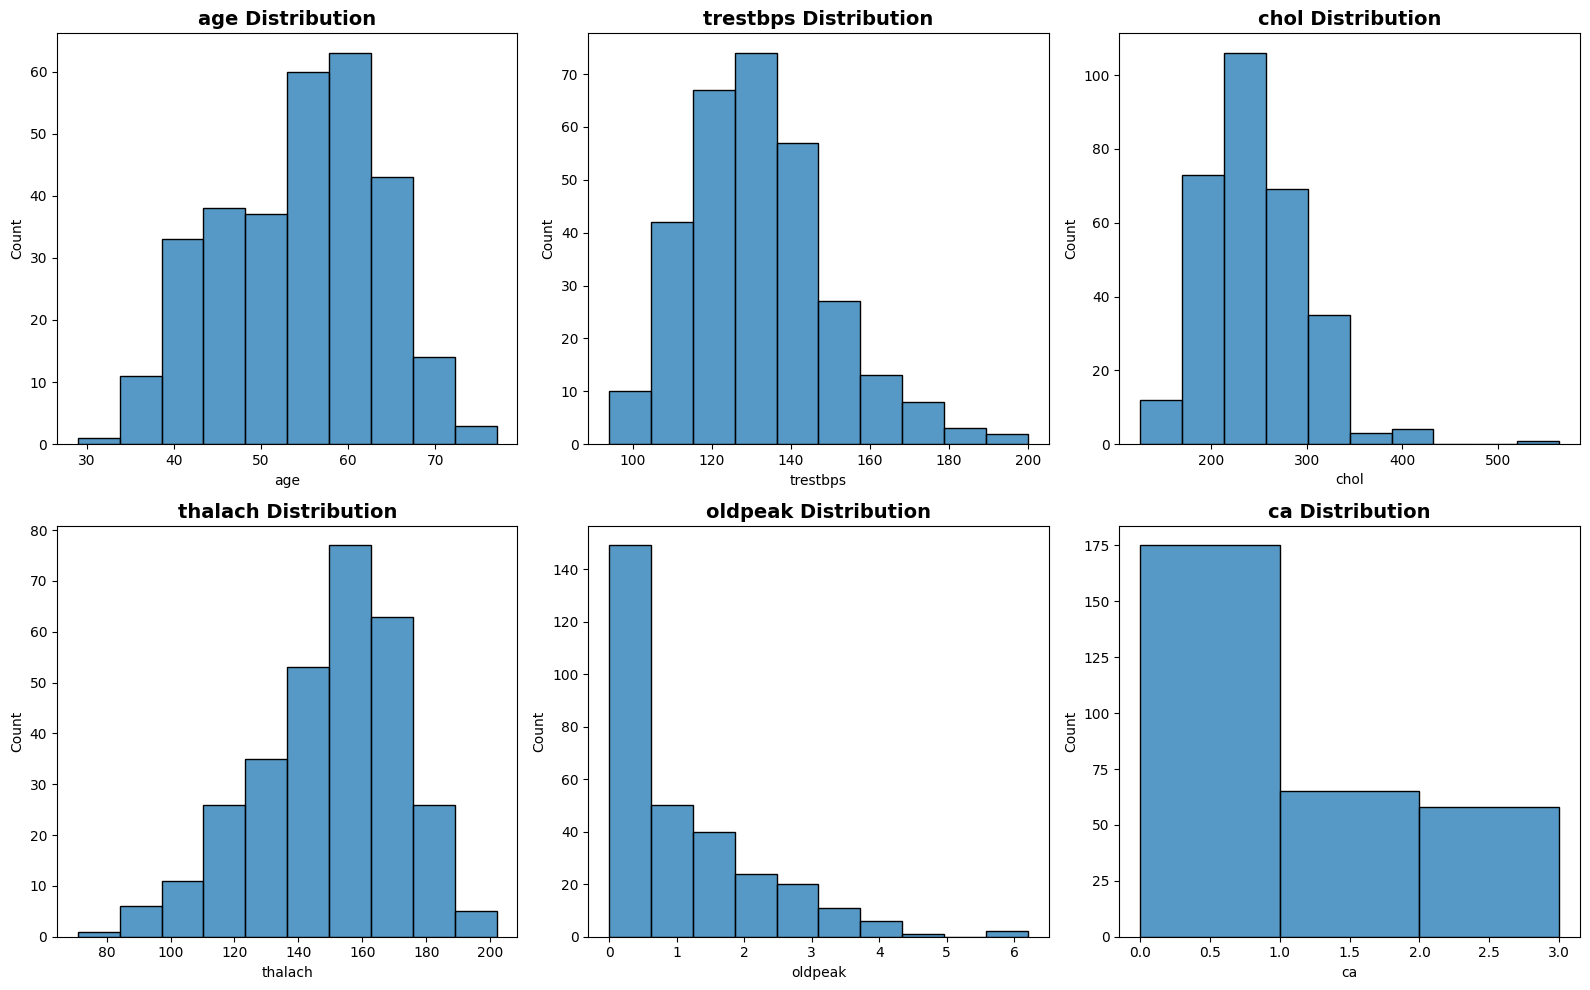

In [16]:
# distribution analysis of numerical features

# creating figure and subplots for the numerical features
fig, ax = plt.subplots( 2,3, figsize= (16,10))

sns.histplot(data= H_disease, x= 'age', ax= ax[0,0], bins= 10)
sns.histplot(data = H_disease, x= 'trestbps', ax= ax[0,1], bins = 10)
sns.histplot(data = H_disease, x= 'chol', ax= ax[0,2], bins = 10)
sns.histplot(data = H_disease, x= 'thalach', ax= ax[1,0], bins = 10)
sns.histplot(data = H_disease, x= 'oldpeak', ax= ax[1,1], bins = 10)
sns.histplot(data = H_disease, x= 'ca', ax= ax[1,2], binwidth=1)

# creating a list of the features
cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# converting the axes into a 1D array for easy looping
ax = ax.flatten()

# setting the title for the distribution plots
for i, col in enumerate(cols):
    ax[i].set_title(
        f"{col} Distribution",
        fontsize = 14,
        fontweight= 'bold',
        color= 'black')

plt.tight_layout()
plt.show()


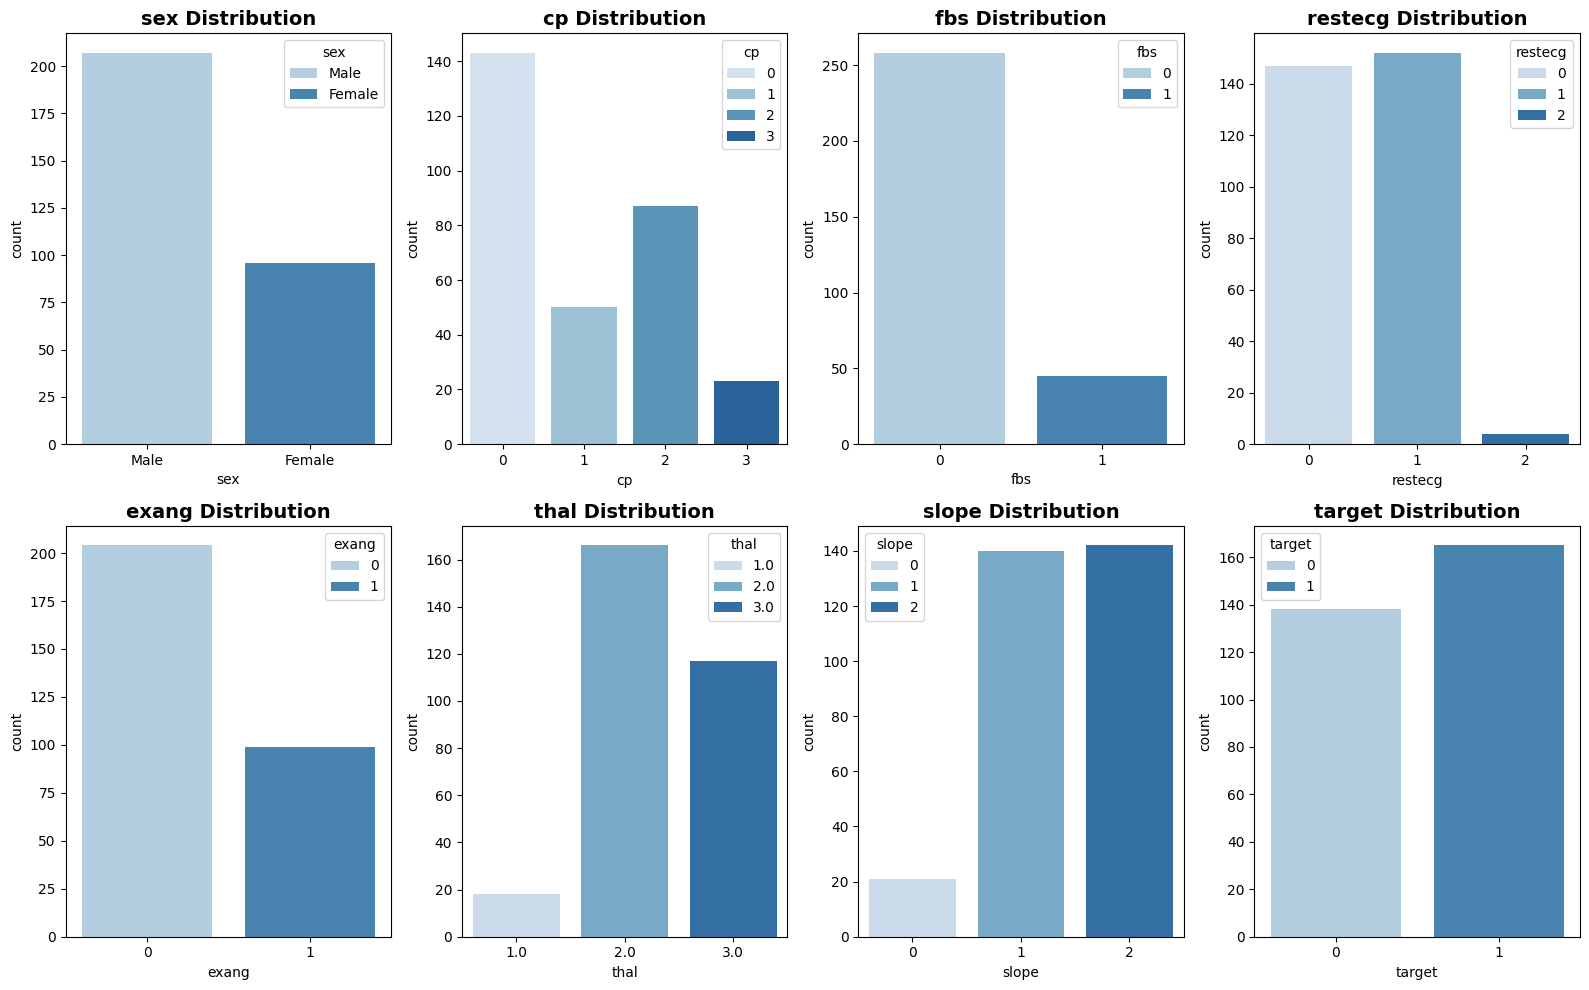

In [17]:
# distribution of categorical features

#creating a figure and the subplots
fig,axs= plt.subplots(2,4, figsize=(16,10))

sns.countplot(data= H_disease, x= 'sex', hue = 'sex', ax = axs[0,0],palette= sns.color_palette('Blues',2),legend = True)
sns.countplot(data= H_disease, x='cp',  hue= 'cp',ax= axs[0,1],palette= sns.color_palette('Blues',4))
sns.countplot(data= H_disease, x= 'fbs', hue ='fbs', ax= axs[0,2], palette= sns.color_palette('Blues',2))
sns.countplot(data= H_disease, x='restecg', hue = 'restecg', ax= axs[0,3], palette= sns.color_palette('Blues',3))
sns.countplot(data=H_disease, x='exang',hue='exang', ax=axs[1,0], palette= sns.color_palette('Blues',2) )
sns.countplot(data=H_disease, x='thal', hue= 'thal', ax=axs[1,1], palette= sns.color_palette('Blues',3))
sns.countplot(data=H_disease, x='slope', hue= 'slope', ax=axs[1,2], palette= sns.color_palette('Blues',3))
sns.countplot(data= H_disease, x= 'target', hue = 'target', ax = axs[1,3], palette= sns.color_palette('Blues',2))

# creating a list of the categorical features
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal', 'slope', 'target']

#converting the axes into 1D array
ax= axs.flatten()

# setting a title for the distribution plots
for i, col in enumerate(columns):
    ax[i].set_title(
        f"{col} Distribution",
        fontsize = 14,
        fontweight= 'bold',
        color= 'black')

plt.tight_layout()
plt.show()       

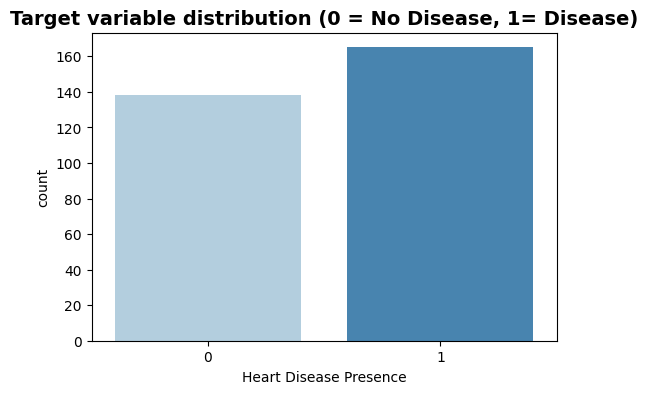

In [18]:
# plotting the target variable
plt.figure(figsize=(6,4))
sns.countplot(data= H_disease, x= 'target', palette =sns.color_palette('Blues',2))
plt.title("Target variable distribution (0 = No Disease, 1= Disease)", fontsize= 14, fontweight='bold')
plt.xlabel('Heart Disease Presence')
plt.show()


The countplot shows 138 participants with no disease(0) while 165 participnts having heart disease(1)

Univariate analysis interpretation:

- Several variables such as trestbps, chol, oldpeak, and ca are right-skewed, meaning most people have lower values, while only a few have very high values.

- Age mainly consists of middle-aged and older adults, with fewer younger participants.

- Some features like thal,sex,fbs,restecg,slope,cp and target are categorical, so they are best understood using countplots instead of skewness.

- Overall, the skewed shapes show that the data is not evenly spread. Some variables may need transformation later to improve modeling.

2. Bivariate analysis

- Analyses the relationship between two variables at a time.

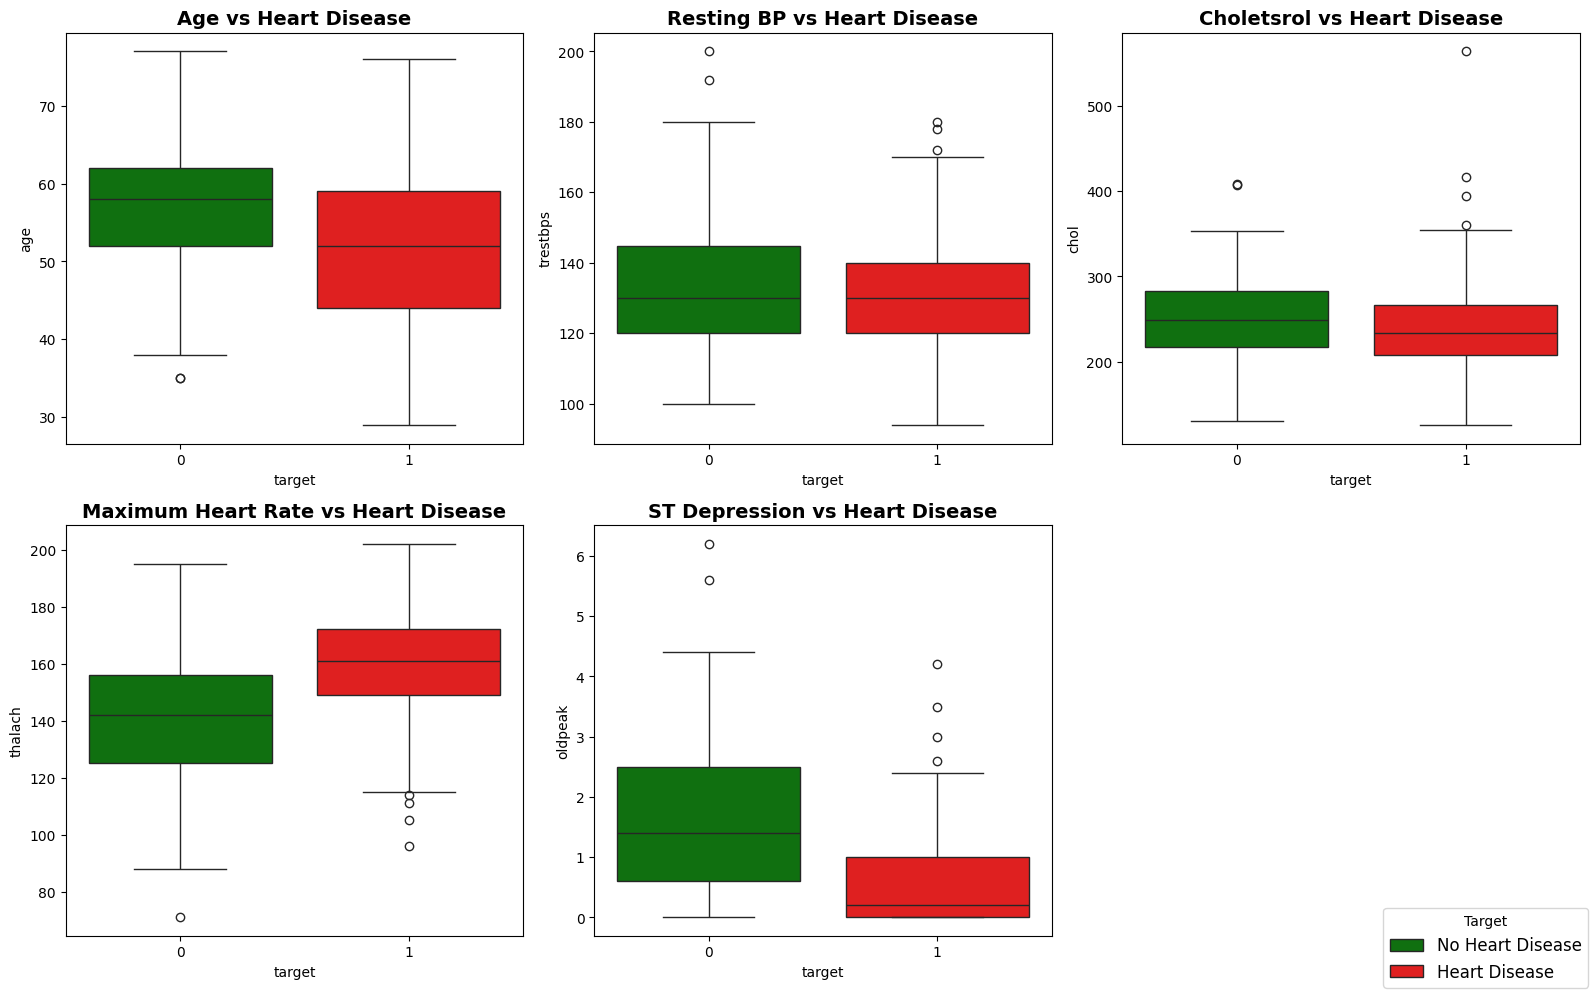

In [19]:
# Numerical features vs target(Numerical->Categorical)

#plotting a figure and sublots
fig,ax= plt.subplots(2,3, figsize=(16,10))

# creating a boxplot to identify the realtionship
sns.boxplot(data=H_disease, x= 'target', y = 'age', ax= ax[0,0], palette={'0':'green', '1':'red'})
sns.boxplot(data= H_disease, x= 'target', y='trestbps', ax= ax[0,1],palette={'0':'green', '1':'red'})
sns.boxplot(data=H_disease, x= 'target', y= 'chol', ax= ax[0,2], palette={'0':'green', '1':'red'})
sns.boxplot(data=H_disease, x= 'target', y= 'thalach', ax=ax[1,0], palette={'0':'green', '1':'red'})
sns.boxplot(data=H_disease, x= 'target', y= 'oldpeak', ax= ax[1,1], palette={'0':'green', '1':'red'})

# Creating column list
cols = ['age','trestbps', 'chol','thalach', 'oldpeak']

# A list of unique titles
titles= [
    'Age vs Heart Disease',
    'Resting BP vs Heart Disease',
    'Choletsrol vs Heart Disease',
    'Maximum Heart Rate vs Heart Disease', 
    'ST Depression vs Heart Disease'
]

#converting the axes into 1D arraty
ax= ax.flatten()

# loop through subplots
for i, col in enumerate(cols):
    ax[i].set_title(
        titles[i],
        fontsize=14,
        color='black',
        fontweight='bold'
    )
   
# turning off the empty subplot
ax[-1].axis('off')

# adding a single legend for rthe whole figure
fig.legend(labels= ['No Heart Disease', 'Heart Disease'], loc= 'lower right', fontsize= 12, title= 'Target')

plt.tight_layout()
plt.show()


Bivariate analysis interpretation:

1. Age vs Heart disease:

- The median age of those with heart disease is lower than those without heart disease.

- This suggest that the heart disease is more common among the middle aged adults. 

- However, the variablility means those with herat disease have  awide age range, including both the middle aged and older adults.

2. Resting BP vs heart disease:

- The median resting bp is similar between those with heart disease and those without the disease. 

- The spread is also alittle larger for those without the disease, suggesting that patients without the disease show more flactuations in BP values.

- There are outliers in both cases, meaning extreme BP values among both individuals.

3. Cholestrol vs hert disease:

- The median cholestrol is slightly higher in those without(green) the disease compared to those with the eart disease(red).

- The disease group has also more outliers, meaning more extreme high cholestrol values among heart disease patients.

4. Maximum heart rate vs Heart disease:

- People with heart disease have a higher maximum heart rate compared to those without.

- This fails to align with the medical expectation, where people with heart disease usually achieve lower maximum heart rate.

5. ST depression vs heart disease:

- The St depression is significantly higher among individuals without the disease compared to those with the disease.

- This suggests that the patterns do not fully align with the medical expectations, therefore the dataset might have noise, recording differences or individual variations.



Overall, no single variable perfectly separates the group.


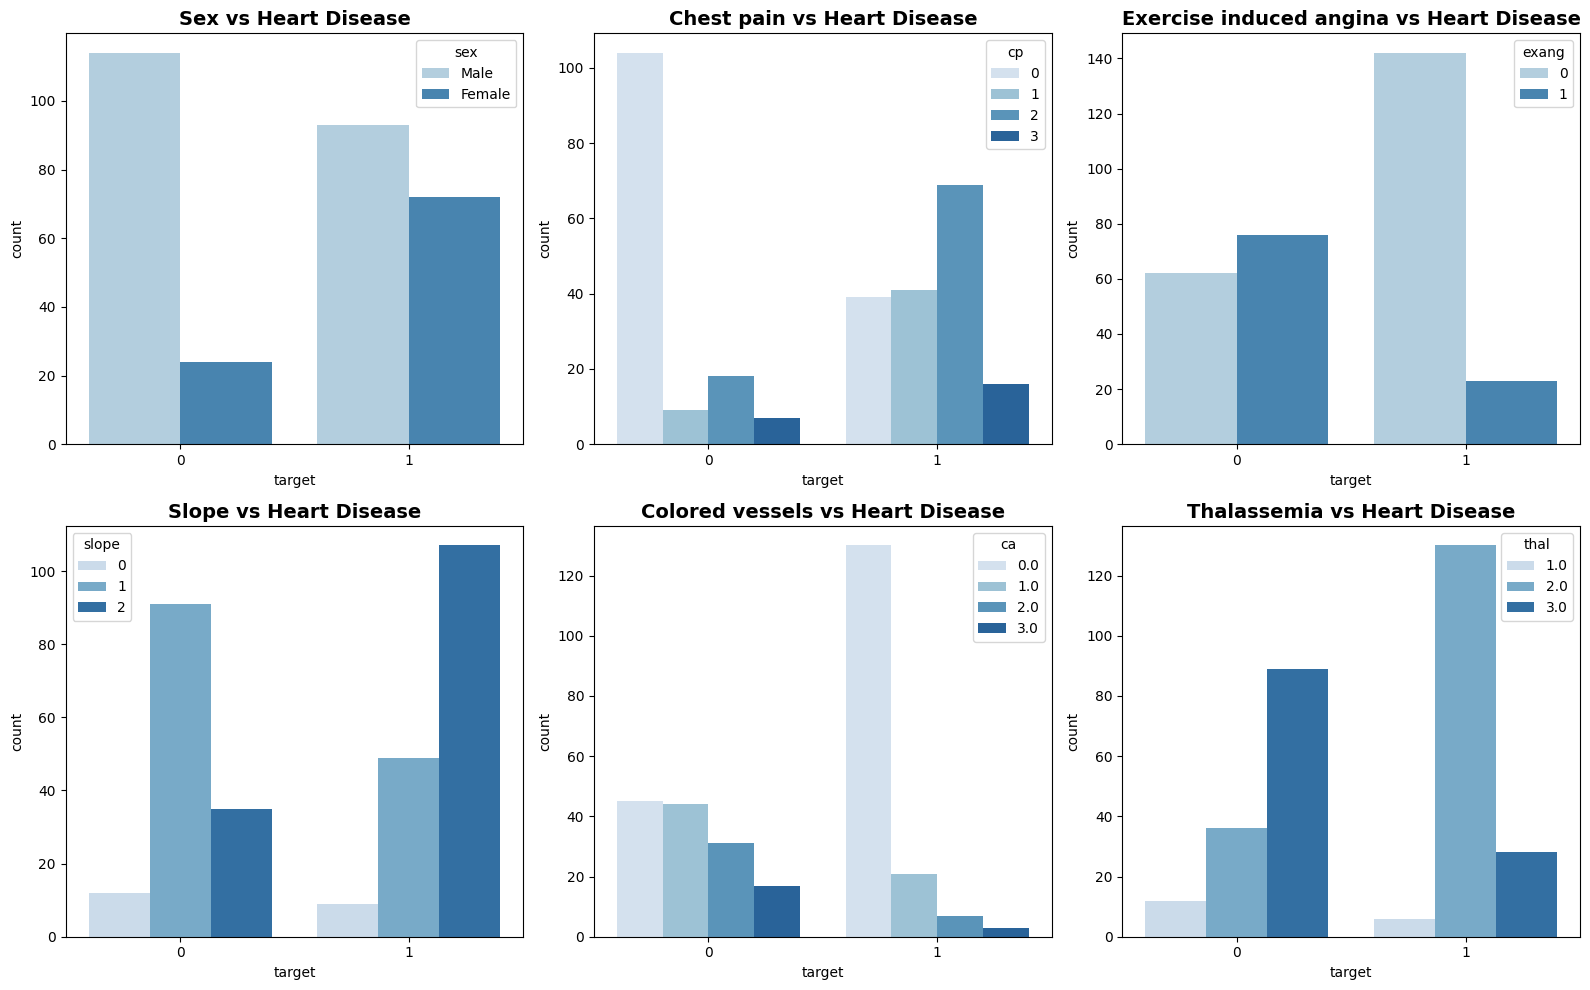

In [20]:
# Categorical features vs Target(Categorical-> Categorical)

# creating a fig and subplots
fig,ax = plt.subplots(2,3, figsize=(16,10))

sns.countplot(data= H_disease, x= 'target', hue = 'sex', ax= ax[0,0],palette= sns.color_palette('Blues',2))
sns.countplot(data=H_disease, x= 'target', hue= 'cp', ax =ax[0,1], palette= sns.color_palette('Blues',4))
sns.countplot(data= H_disease, x= 'target', hue = 'exang', ax=ax[0,2], palette= sns.color_palette('Blues',2))
sns.countplot(data= H_disease, x= 'target', hue='slope', ax=ax[1,0], palette= sns.color_palette('Blues',3))
sns.countplot(data=H_disease, x='target', hue='ca', ax=ax[1,1], palette= sns.color_palette('Blues',4))
sns.countplot(data=H_disease, x='target', hue='thal', ax=ax[1,2], palette= sns.color_palette('Blues',3))

# Creating column list
cols = ['sex','cp','exang','slope', 'ca', 'thal']

# A list of unique titles
title= [
    'Sex vs Heart Disease',
    'Chest pain vs Heart Disease',
    'Exercise induced angina vs Heart Disease',
    'Slope vs Heart Disease',
    'Colored vessels vs Heart Disease', 
    'Thalassemia vs Heart Disease'
]

#converting the axes into 1D arraty
ax= ax.flatten()

# loop through subplots
for i, col in enumerate(cols):
    ax[i].set_title(
        title[i],
        fontsize=14,
        color='black',
        fontweight='bold'
    )
   

plt.tight_layout()
plt.show()


3. Multivariate analysis
-  Analyses the realtionship between three or more variables at a time.

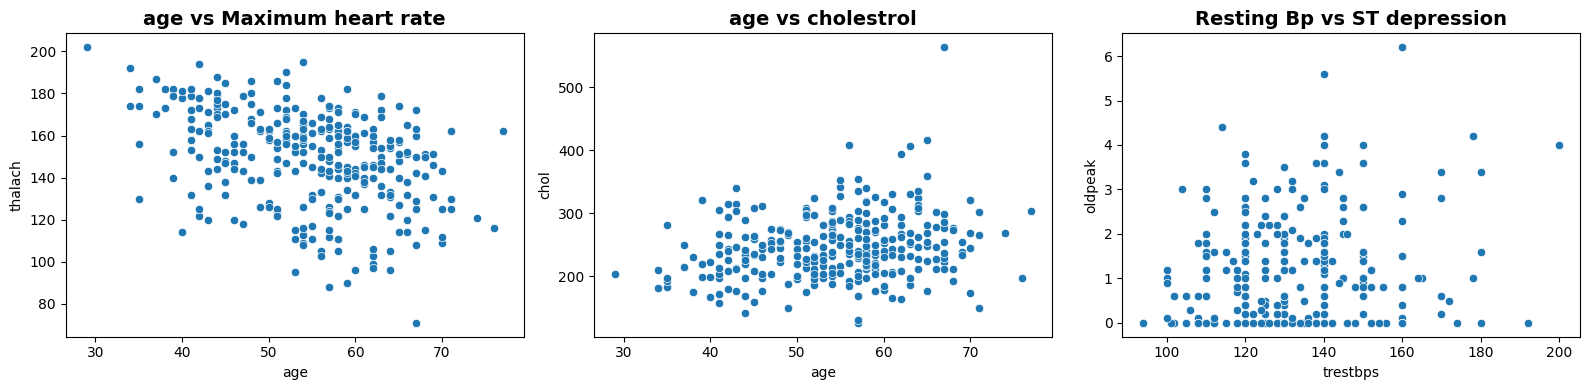

In [21]:
# plotting scatterplots

fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.scatterplot(data= H_disease, x= 'age', y= 'thalach', ax= axs[0])
sns.scatterplot(data= H_disease, x= 'age', y ='chol', ax= axs[1])
sns.scatterplot(data= H_disease, x= 'trestbps', y= 'oldpeak', ax= axs[2])

# A list of unique titles
title= [
    'age vs Maximum heart rate',
    'age vs cholestrol',
    'Resting Bp vs ST depression',
]

# setting title
for i in range(3):
    axs[i].set_title(
        title[i],
        fontsize=14,
        color='black',
        fontweight='bold'
    )
   

plt.tight_layout()
plt.show()

Scatter plot interpretation:

1. Age vs Maximum Heart Rate (thalach)

There is a negative relationship: as age increases, the maximum heart rate tends to decrease. This aligns with physiological expectations, as older adults generally have lower maximum heart rates.

2. Age vs Cholesterol (chol)

There appears to be no clear relationship: age and cholesterol levels do not show a consistent pattern, suggesting they are largely independent in this dataset.

3. Resting Blood Pressure (trestbps) vs ST Depression (oldpeak)

There is no noticeable relationship: resting blood pressure does not seem to predict ST depression, indicating independence between these two variables in this dataset.

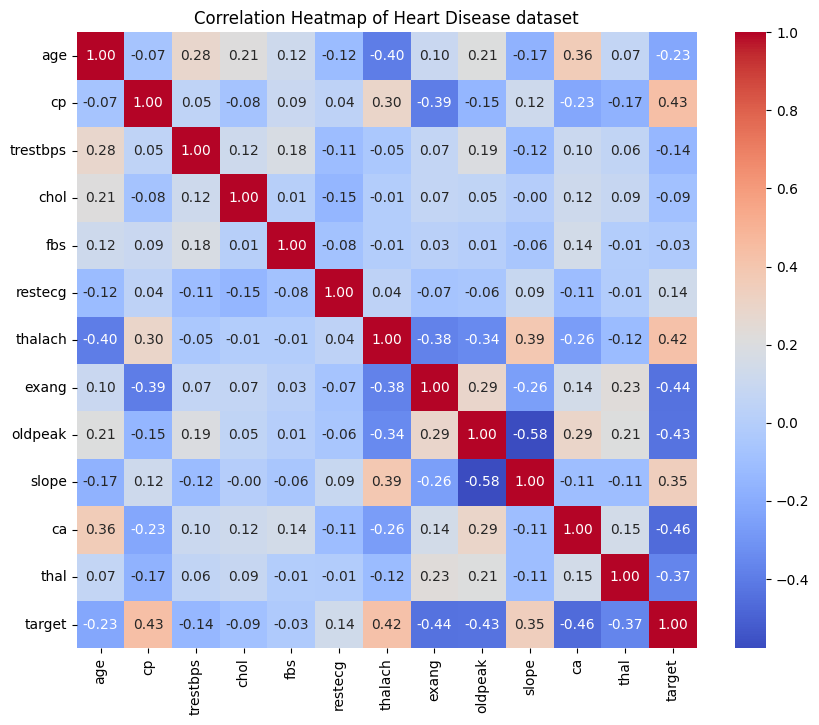

In [22]:
# creating a correlational matrix for numeric features
numeric_cols= H_disease.select_dtypes(include = 'number')
corr = numeric_cols.corr()

# plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Disease dataset')
plt.show()



Correlation heatmap interpretation:

1.Positive correlations:

- Some variables like chest pain, maximum heart rate, slope and restecg appear to have positive correlation with the target(Heart disease).

- This suggests that higher values for these variables might increase the risk of heart disease.

2. Negative correlations:

- Some variables like age, resting bp, cholestrol, fbs, exercise induced angina, ST depression, colored vessels and thalasemia appear to have a negative correlation with the target(Heart disease).

- This suggests that higher values of these variables might reduce the risk of heart disease.

Overall EDA interpretation:

- Heart disease in this dataset is influenced by a combination of demographic and clinical factors rather than any single variable. 

- While some patterns, like maximum heart rate decreasing with age, follow expectations, others are unusual.

- This shows that to accurately assess risk, we need to consider multiple factors together using models that analyze all variables at once.

Data Preprocessing

In [23]:
# mapping the sex column  

H_disease['sex']= H_disease['sex'].map({'Male':1, 'Female': 0})

# checking the first 5 rows
H_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [24]:
# imputing the missing values in ca and thal with a median
median_value = H_disease['thal'].median()   #---> computes the median value
H_disease['thal']= H_disease['thal'].fillna(median_value)

median_val = H_disease['ca'].median()    # --> computes the median value for ca
H_disease['ca']= H_disease['ca'].fillna(median_val)   #--> replace the missing value with the median

# rechecking the dataset for mssing values
print(H_disease.isnull().sum())

print('\nThe missing values have been succefully imputed')

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The missing values have been succefully imputed


1. Logistic Regression Model training

In [25]:
# importing the necessary dependency
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
# separating the feature from the target
X= H_disease.drop(columns='target', axis = 1)
Y= H_disease['target']

In [27]:
# splitting the data into taining and testing 
X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

# checking the shape of the train and test 
print(X.shape,X_train.shape,X_test.shape)
print("*"*40)
print(Y.shape,y_train.shape,y_test.shape)

(303, 13) (242, 13) (61, 13)
****************************************
(303,) (242,) (61,)


Data Standardization of the trainig data

- This ensures that the data falls within a similar or particular range that makes it easy for machine learning model to make predictions.

In [28]:
# Initialising the standardscaler
Scaler = StandardScaler()

# scaling the values of the trainig data
X_train_standardized = Scaler.fit_transform(X_train)

# scaling the test data
X_test_standardized = Scaler.transform(X_test)


In [29]:
# printing out the standardized data  ---> Standardization ensures the values are within the same ranges
print(X_train_standardized)
print("**"*80)
print(X_test_standardized)

[[-1.35679832  0.72250438  0.00809909 ...  0.95390513 -0.68814973
  -0.53984783]
 [ 0.38508599  0.72250438 -0.97189094 ...  0.95390513 -0.68814973
   1.20206116]
 [-0.92132724  0.72250438  0.98808912 ... -0.69498803 -0.68814973
  -0.53984783]
 ...
 [ 1.58263146  0.72250438  1.96807914 ... -0.69498803  0.40029625
  -0.53984783]
 [-0.92132724  0.72250438 -0.97189094 ...  0.95390513 -0.68814973
   1.20206116]
 [ 0.92942484 -1.38407465  0.00809909 ...  0.95390513  1.48874224
  -0.53984783]]
****************************************************************************************************************************************************************
[[ 2.76218225e-01  7.22504380e-01 -9.71890936e-01  1.16949120e+00
   5.53408401e-01 -3.83300706e-01 -1.04610909e+00 -1.70875171e+00
   1.47790748e+00 -3.75556276e-01 -6.94988026e-01  4.00296251e-01
  -2.28175682e+00]
 [ 4.93953764e-01  7.22504380e-01  1.96807914e+00  2.36038903e+00
   7.81171723e-01 -3.83300706e-01 -1.04610909e+00  3.98288831e-0

Model training

Algorithm to be used ---> Logistic regression. Binary classification model
- The target variable is either 1(Heart disease) or 0(No disease)

In [30]:
# Initializing the model

model = LogisticRegression(random_state=42)

# Fitting the model with the model withnthe feature(X_traine_standardized) and label(y_train)
model.fit(X_train_standardized,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Model evaluation

- Measuring how well the model performaned using the test data

In [31]:
# creating the y_predictions

y_pred = model.predict(X_test_standardized)

In [32]:
# checking the accuracy of the model
accuracy = accuracy_score(y_pred,y_test)
print(f'The accuracy score is: {accuracy:.4f}''\n')

#Use of confusion matrix to check the performamnce of the model
conf_matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print(f'The confusion matrix is:\n{conf_matrix}\n')

# use of classification score to check the performamnce of the model
class_report=classification_report(y_test,y_pred)
print(f"Classification report is: \n{class_report}")



The accuracy score is: 0.8852

The confusion matrix is:
[[28  4]
 [ 3 26]]

Classification report is: 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



1. Accurracy:
- Tells us how often the model is correct.

- The model correctly predicted 89% of all the cases.

2. Precision:

- Of all the predicted positive cases(heart disease), how many were actually positive.(TP/TP+FP)

- When the model predicts someone has heart disease, it is correct 90% of the time.

3. Recall(Sensitivity):

- Of all the actual positive, how many did the model correctly identify? (TP/TP+FN)

- The model correctly identifies 88% of the people with heart disease.

4. f1-score:
- It is the average of the precision and recall. It balances both metrics

- The f1-score is 89% meaning the model has a good balance between precision and recall.

Overall interpretation:

- The model is quite accurate (89%).

- It detects heart disease well (recall 88%).

- It makes few false alarms(FP=3).

- Overral, the model is reliable for identifying heart disease,though a few cases are missed(FN=4).



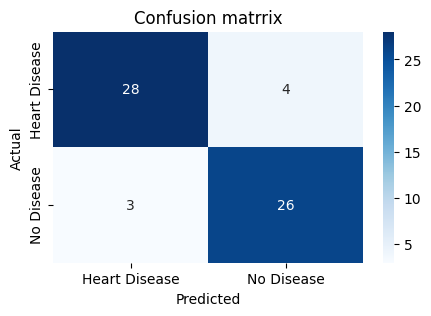

In [33]:
# Using the confusion matrix
#y_test--> the actual labels(0,1), y_pred ---> predicted labels from the logistic regression

# generating a confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred, labels=[1,0])  #--> ensures 1->Heart disease 0-> no disease

# plotting confusion matrix heatmap
plt.figure(figsize =(5,3))
sns.heatmap(conf_matrix,annot =True,fmt ='d',cmap = 'Blues',
            xticklabels=['Heart Disease', 'No Disease'],
            yticklabels=['Heart Disease', 'No Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrrix')
plt.show()


TP(True Positive)= 28 --> 28 people with heart disease were correctly predicted as having heart disease.

FP(False Positive)= 3 --> 3 people without the heart disease were incorrectly predicted as having heart disease.

FN(False Negative)=4  --> 4 people with heart disease were missed(predicted as No disease).

TN(True Negative)= 26 --> 26 people without the heart disease were corectly predicted as No disease.

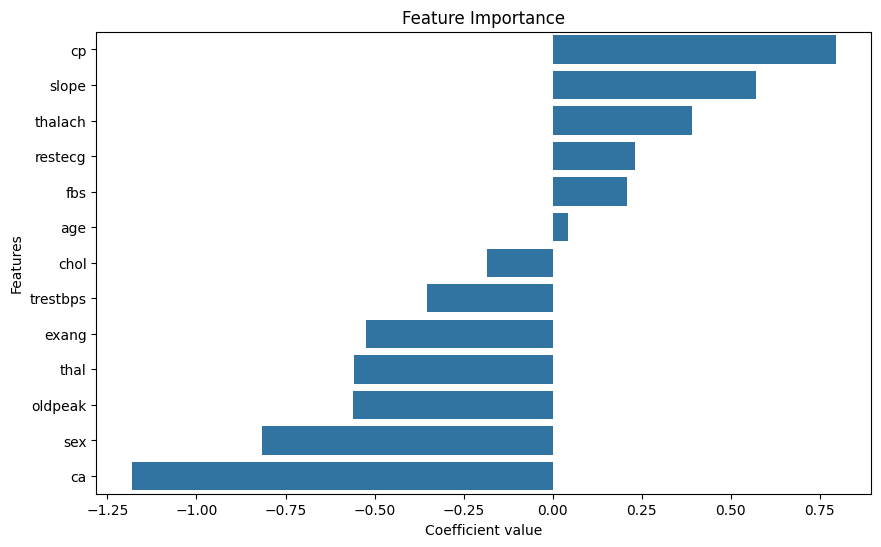

In [34]:
# Feature Importance/Interpretation of the model
# Identifying which feature derive predictions based on the coeefficients


# feature importance of the model
feature_importance = pd.Series(model.coef_[0], index= X_train.columns)
feature_importance = feature_importance.sort_values(ascending= False)


plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y = feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Coefficient value")
plt.ylabel("Features")
plt.show()

Feature Importance interpretation:

- Features like cp (chest pain), thalach (max heart rate), slope, and restecg had the highest positive influence on heart disease prediction.


Making a predictive system

In [35]:
# creating a list to hold the data
input_data = [57,0,0,120,350,0,1,163,1,0.6,2,0.0,2.0]

# Converting the list to a numpy array for easy manipulation by the model
input_data_as_array =  np.asarray(input_data)

# reshaping the numpy array into a 2D as we are using 1D in our data
input_data_reshaped = input_data_as_array.reshape(1,-1)

# Standardizing the input data
Standard_input_data = Scaler.transform(input_data_reshaped)
print(Standard_input_data)

# fitting the standardized input data into the model
predictions = model.predict(Standard_input_data)

# calling the predict value
print("This is the target:", predictions)

if (predictions[0] == 0):
    print("The person has No Disease")
else:
    print("The person has Heart Disease")


[[ 0.27621823 -1.38407465 -0.97189094 -0.61685555  1.95794888 -0.38330071
   0.8431327   0.57761143  1.47790748 -0.3755563   0.95390513 -0.68814973
  -0.53984783]]
This is the target: [1]
The person has Heart Disease


c:\Users\hp\Desktop\DS_25\Heart_Disease_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2. Decison Tree model

In [36]:
# importing the necessary dependencies

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Training the model

In [37]:
#checking the shape of the training and test data 
print(f"Shape of the X variables:\n{X.shape,X_train.shape,X_test.shape}")
print("*"*40)
print(f"Shape of the y variable:\n{Y.shape,y_train.shape,y_test.shape}")

# Initializing the decision tree classifier
dtree= DecisionTreeClassifier(random_state= 42)

# fitting and training the model
dtree.fit(X_train,y_train)

Shape of the X variables:
((303, 13), (242, 13), (61, 13))
****************************************
Shape of the y variable:
((303,), (242,), (61,))


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Model Evaluation

In [38]:
# creating the y_pred value
y_pred_1 = dtree.predict(X_test)

# Evaluate the model
accuracy= accuracy_score(y_pred_1,y_test)
print(f"Accuracy: {accuracy:.4f}" '\n')

class_report = classification_report(y_pred_1,y_test)
print("Classification report:\n", class_report)
print("="*60)


Accuracy: 0.7705

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



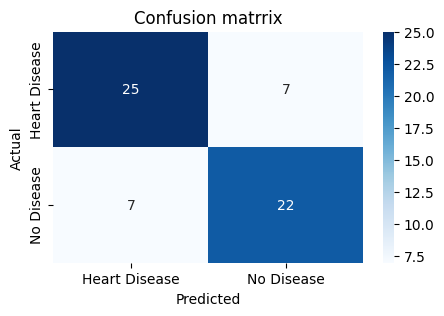

In [39]:

# generating a confusion matrix
cm = confusion_matrix(y_test,y_pred_1, labels=[1,0])  #--> ensures 1->Heart disease 0-> no disease

# plotting confusion matrix heatmap
plt.figure(figsize =(5,3))
sns.heatmap(cm,annot =True,fmt ='d',cmap = 'Blues',
            xticklabels=['Heart Disease', 'No Disease'],
            yticklabels=['Heart Disease', 'No Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrrix')
plt.show()


Overall interpretation:

- The model is quite accurate(77%).

- It is good in detecting heart disease (recall 78%).

- It makes few false alarms(FP=7).

- Overral, the model is reliable for identifying heart disease,though a few cases are missed(FN=7).

Decission Tree Visualization



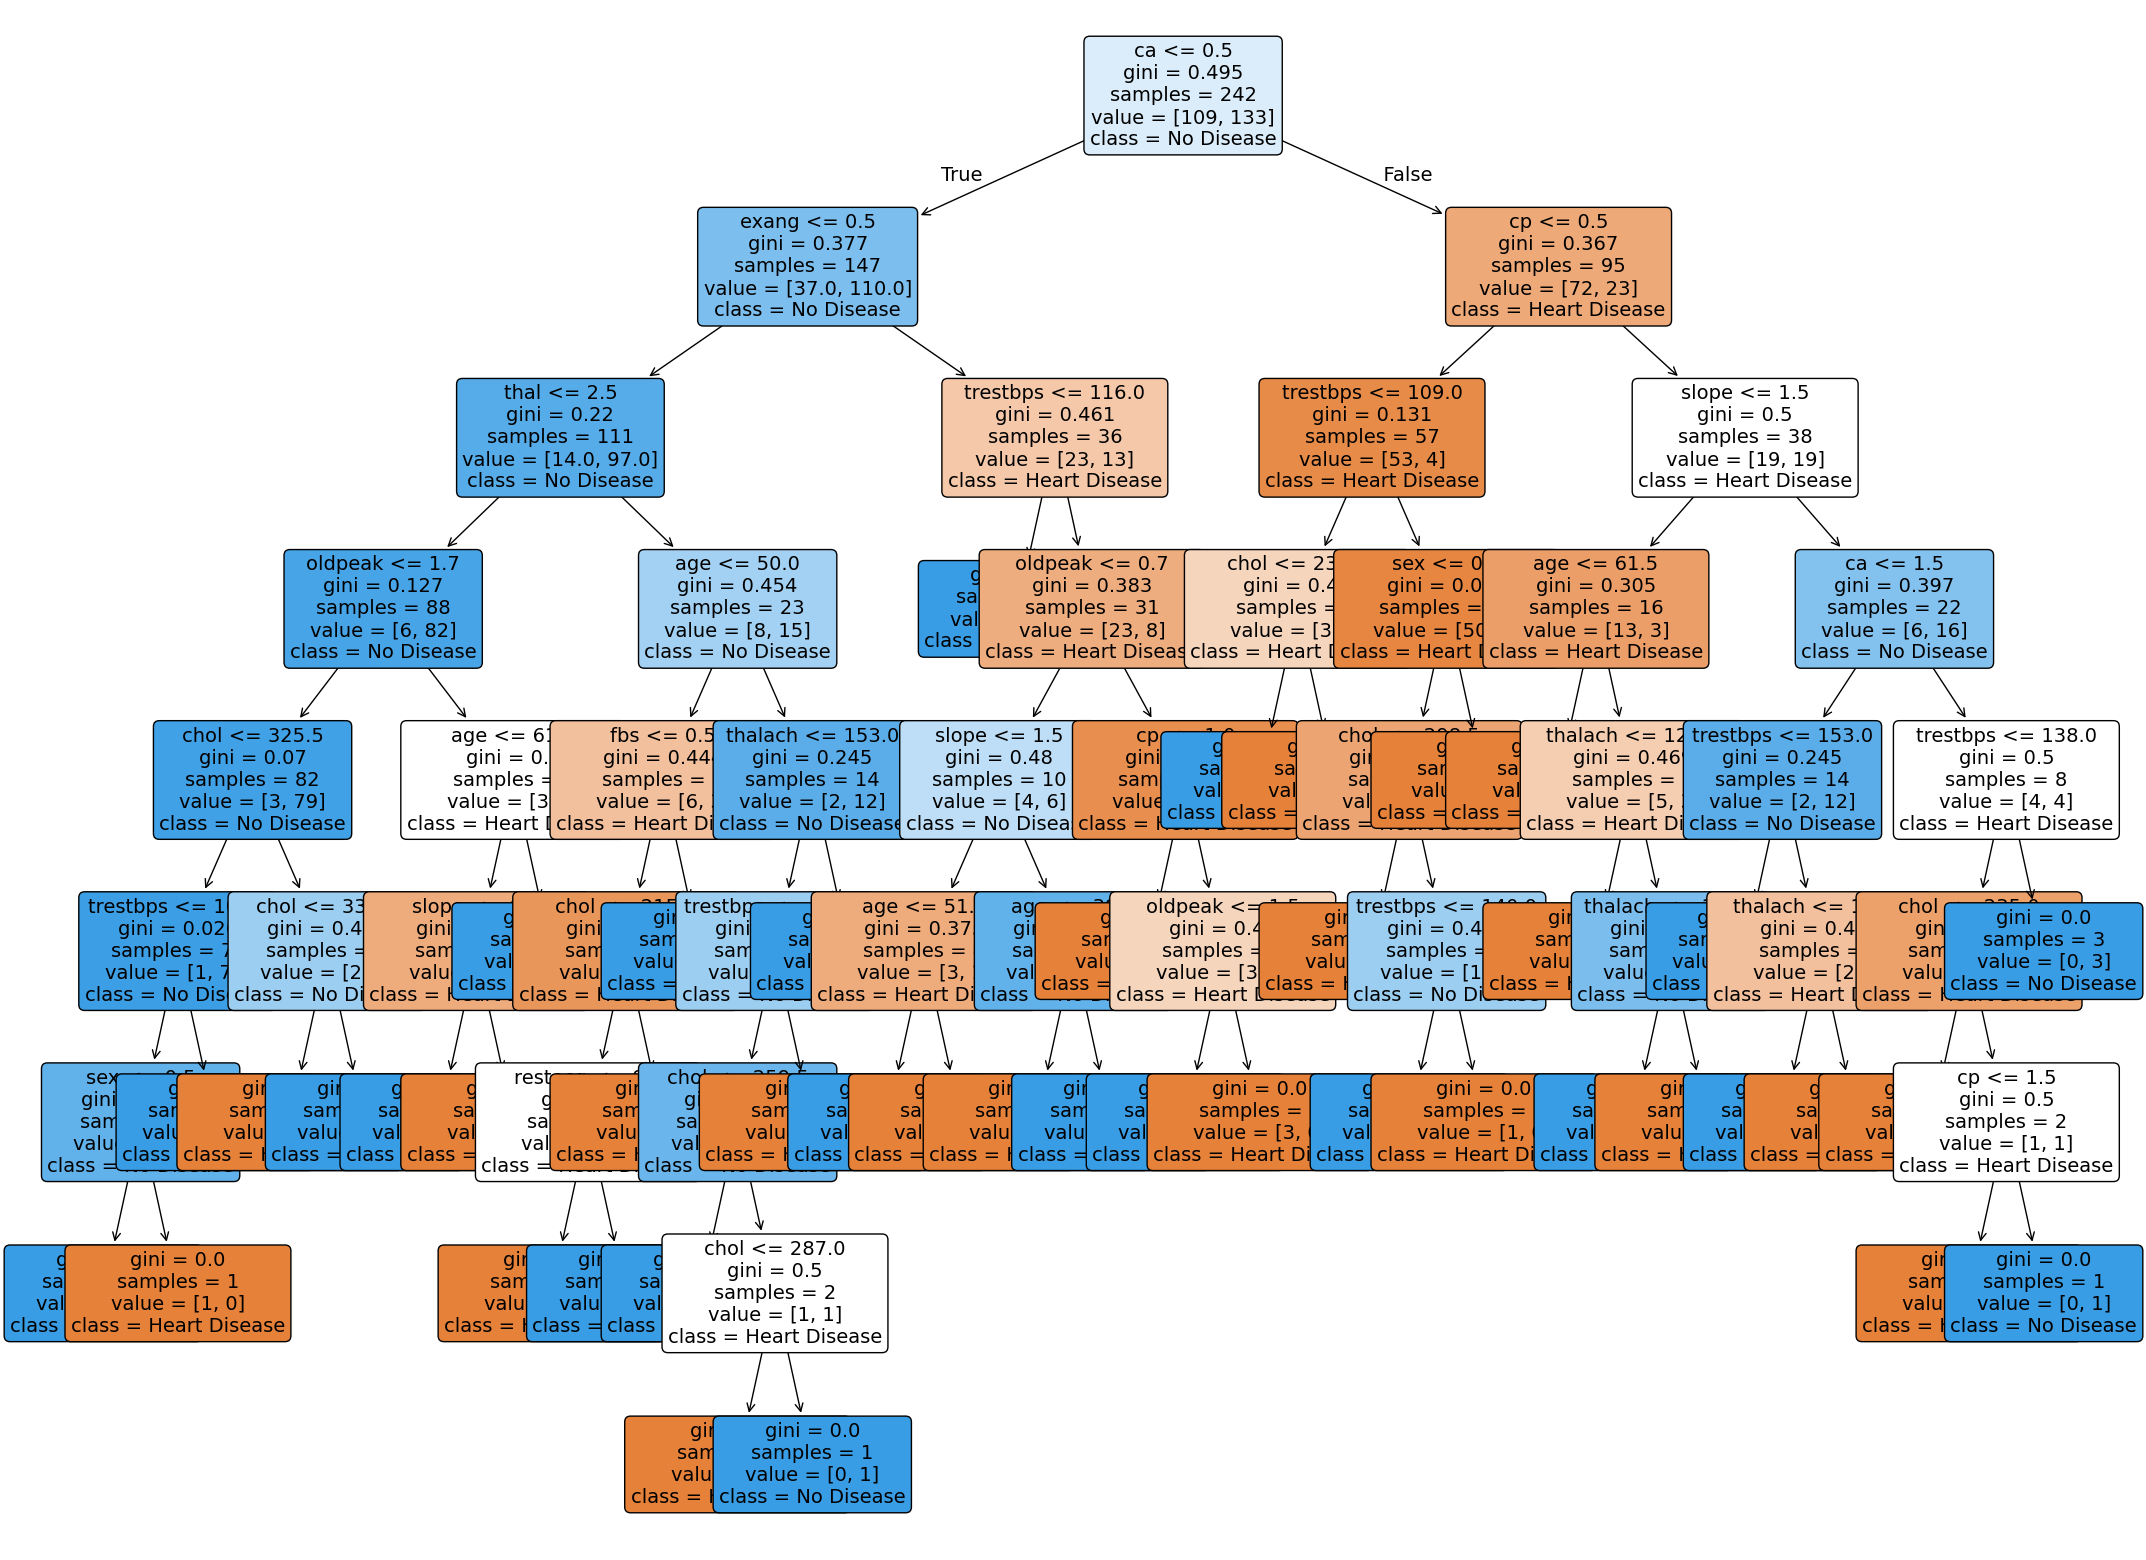

In [40]:
#Plotting the tree
print("Decission Tree Visualization\n")
plt.figure(figsize= (26,20))
tree.plot_tree(
    dtree,
    feature_names= X.columns,  #--> names of features
    class_names= ['Heart Disease', 'No Disease'],  #--> labes for the target class
    filled = True, # --> color nodes by class
    rounded = True,  #--> rounded corners
    fontsize= 14
)

plt.show()

Making a predictive system

In [41]:
# creating a list to hold the data
input_data = [50,1,2,140,233,0,1,163,0,0.6,1,1,3]


# Converting the list to a numpy array for easy manipulation by the model
input_data_as_array =  np.asarray(input_data)

# reshaping the numpy array into a 2D as we are using 1D in our data
input_data_reshaped = input_data_as_array.reshape(1,-1)

# fitting the standardized input data into the model
predictions = dtree.predict(input_data_reshaped)

# calling the predict value
print("This is the target:", predictions)

if (predictions[0] == 0):
    print("The person has No Disease")
else:
    print("The person has Heart Disease")


This is the target: [0]
The person has No Disease


c:\Users\hp\Desktop\DS_25\Heart_Disease_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


3.Support Vector Machine

- This is a supervised machine learning model/algorithm that tries to find the best boundary(hyperplane) that separates data into different classes.

In [42]:
# importing the necessary dependencies

from sklearn import svm  # support vector machine model/algorithm

Training the model

In [43]:
#checking the shape of the features and the label

print(f"Shape of the X variables:\n {X.shape,X_train_standardized.shape,X_test_standardized.shape}")
print("*"*40)
print(f" Shape of the Y variable:\n {Y.shape,y_train.shape,y_test.shape}")


Shape of the X variables:
 ((303, 13), (242, 13), (61, 13))
****************************************
 Shape of the Y variable:
 ((303,), (242,), (61,))


In [44]:
# Initializing the model
model_classifier = svm.SVC(kernel = 'linear', probability= True,random_state=42)  
# --> linear defines how the model separates the data by trying to find a straight line or hyperplane that bests separate the classes.

# fitting the training data to the model
model_classifier.fit(X_train_standardized,y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Model evaluation

In [45]:
# creating the predicted values
y_pred_2= model_classifier.predict(X_test_standardized) 

#Evaluating the accurracy of the model
accuracy= accuracy_score(y_test,y_pred_2)
print(f"The accuracy score is: {accuracy:.4f}" '\n')

class_report_1= classification_report(y_test,y_pred_2)
print(f"The classsification report is:\n", class_report_1)


The accuracy score is: 0.8689

The classsification report is:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



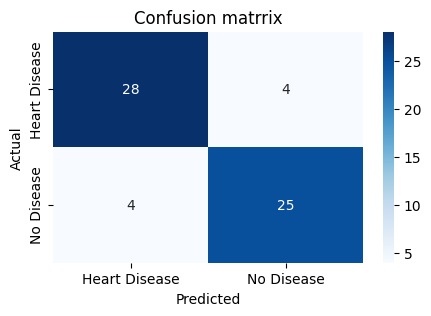

In [46]:
# generating a confusion matrix
c_matrix = confusion_matrix(y_test,y_pred_2, labels=[1,0])  #--> ensures 1->Heart disease 0-> no disease

# plotting confusion matrix heatmap
plt.figure(figsize =(5,3))
sns.heatmap(c_matrix,annot =True,fmt ='d',cmap = 'Blues',
            xticklabels=['Heart Disease', 'No Disease'],
            yticklabels=['Heart Disease', 'No Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrrix')
plt.show()

Overall interpretation:

- The model is quite accurate(87%).

- It detects the heart disease well (recall 88%).

- It makes few false alarms(FP=4).

- Overral, the model is reliable for identifying heart disease,though a few cases are missed(FN=4).

Making a predictive system

In [47]:
# creating a list to hold the data
input_data = [57,0,0,120,350,0,1,163,1,0.6,2,0.0,2.0]

# Converting the list to a numpy array for easy manipulation by the model
input_data_as_array =  np.asarray(input_data)

# reshaping the numpy array into a 2D as we are using 1D in our data
input_data_reshaped = input_data_as_array.reshape(1,-1)

# Standardizing the input data
Standard_input_data = Scaler.transform(input_data_reshaped)
print(Standard_input_data)

# fitting the standardized input data into the model
predictions = model.predict(Standard_input_data)

# calling the predict value
print("This is the target:", predictions)

if (predictions[0] == 0):
    print("The person has No Disease")
else:
    print("The person has Heart Disease")


[[ 0.27621823 -1.38407465 -0.97189094 -0.61685555  1.95794888 -0.38330071
   0.8431327   0.57761143  1.47790748 -0.3755563   0.95390513 -0.68814973
  -0.53984783]]
This is the target: [1]
The person has Heart Disease


c:\Users\hp\Desktop\DS_25\Heart_Disease_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


4. Gradient boosting model(XGBoost)

- It uses the ensemble learning method of decision trees sequentially.

In [48]:
# importing the necessary library
import xgboost as xgb


In [49]:
# Initializing the XGBoost classifier
model_classifier_1 = xgb.XGBClassifier(
    n_estimators=100,   # number of trees
    learning_rate=0.1,  # step size for each boosting iteration
    max_depth=3,        # depth of each tree
    random_state=42
)



Model training

In [50]:
#training the model
model_classifier_1.fit(X_train_standardized,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Model evaluation

The accuracy score is: 0.7869

The classification report is:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



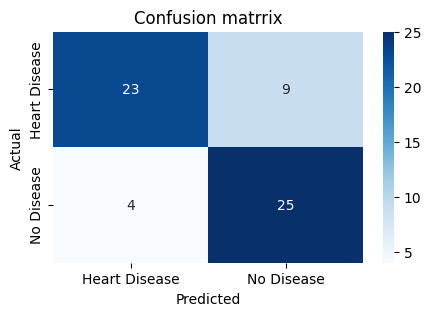

In [51]:
# creating the y_predictions values
y_pred_3 = model_classifier_1.predict(X_test_standardized)

# evaluating the model accurracy
accuracy = accuracy_score(y_test,y_pred_3)
print(f"The accuracy score is: {accuracy:.4f}\n")

class_report_2 = classification_report(y_test,y_pred_3)
print(f"The classification report is:\n {class_report_2}")

# confusion matrix
confusion_m= confusion_matrix(y_test,y_pred_3, labels=[1,0])

#plotting the confusion matrix
plt.figure(figsize =(5,3))
sns.heatmap(confusion_m,annot =True,fmt ='d',cmap = 'Blues',
            xticklabels=['Heart Disease', 'No Disease'],
            yticklabels=['Heart Disease', 'No Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrrix')
plt.show()


Overall interpretation:

- The model is quite accurate (79%).

- It detects heart disease well (recall 72%).

- It makes few false alarms(FP=4).

- Overral, the model is reliable for identifying heart disease,though a few cases are missed(FN=9).

Making predictive system 

In [52]:
# creating a list to hold the data
input_data = [44,1,0,120,169,0,1,144,1,2.8,0,0,1]

# Converting the list to a numpy array for easy manipulation by the model
input_data_as_array =  np.asarray(input_data)

# reshaping the numpy array into a 2D as we are using 1D in our data
input_data_reshaped = input_data_as_array.reshape(1,-1)

# Standardizing the input data
Standard_input_data = Scaler.transform(input_data_reshaped)
print(Standard_input_data)

# fitting the standardized input data into the model
predictions = model.predict(Standard_input_data)

# calling the predict value
print("This is the target:", predictions)

if (predictions[0] == 0):
    print("The person has No Disease")
else:
    print("The person has Heart Disease")


[[-1.13906278  0.72250438 -0.97189094 -0.61685555 -1.47748122 -0.38330071
   0.8431327  -0.27417092  1.47790748  1.62390543 -2.34388119 -0.68814973
  -2.28175682]]
This is the target: [0]
The person has No Disease


c:\Users\hp\Desktop\DS_25\Heart_Disease_Project\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Models Evalution using ROC-AUC(Receiever Operating characteristsics-Area under curve)

In [53]:
# importing the necessary library
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve

In [54]:
#predicting probabilities for the XGBoost model
y_probs= model_classifier_1.predict_proba(X_test_standardized)[:,1]  #--> Returns probabilities for the positive class(1-heart disease)

# computing ROC-AUC
auc_score = roc_auc_score(y_test,y_probs)    #--> gets the Area under the ROC curve, to measure model performace
print(f"ROC-AUC for XGBoost:{auc_score:.4f}")



ROC-AUC for XGBoost:0.9149


ROC-AUC Intepretation of XGBoost Model:

- The ROC-AUC of 0.91 indicates the model can correctly distinguish patients with and without heart disease 91% of the time.

In [55]:
# predicting proabilities of logistic regression
y_probs_1= model.predict_proba(X_test_standardized)[:,1] #-->gets the probabilities of the positive class

#computing ROC-AUC
auc_score_1= roc_auc_score(y_test,y_probs_1)   #--> gets the Area under the ROC curve, to measure model performace
print(f"ROC-AUC for Logistic regression: {auc_score_1:.4f}")

ROC-AUC for Logistic regression: 0.9407


ROC-AUC Intepretation of Logistic Model:

- The ROC-AUC of 0.94 indicates the model can correctly distingusih patients with and without heart disease 94% of the time.

In [56]:
# predicting proabilities of Decision tree
y_probs_2= dtree.predict_proba(X_test)[:,1] #-->gets the probabilities of the positive class

#computing ROC-AUC
auc_score_2= roc_auc_score(y_test,y_probs_2)   #--> gets the Area under the ROC curve, to measure model performace
print(f"ROC-AUC for Decision Tree: {auc_score_2:.4f}")

ROC-AUC for Decision Tree: 0.7699


ROC-AUC Intepretation of Decision Tree Model:

- The ROC-AUC of 0.76 indicates the model has moderate ability to distinguish between patients with and without heart disease 76% of the time.

In [57]:
# predicting proabilities of Suport vector machine model
y_probs_3= model_classifier.predict_proba(X_test_standardized)[:,1] #-->gets the probabilities of the positive class

#computing ROC-AUC
auc_score_3= roc_auc_score(y_test,y_probs_3)   #--> gets the Area under the ROC curve, to measure model performace
print(f"ROC-AUC for Support Vector Machine: {auc_score_3:.4f}")

ROC-AUC for Support Vector Machine: 0.9332


ROC-AUC Intepretation of Support Vector Machine:

- The AUC of 0.93 indicates the model can corectly distinguish between patients with and without heart disease 93% of the time.

Selecting the best model

In [58]:
# computing the metrics for each model together

Logistic_metrics = {'accuracy':0.8852,'precision':0.90, 'recall':0.88, 'f1-score':0.89, 'ROC-AUC':0.94}
SVM_metrics = {'accuracy':0.7869, 'precision':0.85, 'recall':0.72, 'f1-score':0.78, 'ROC-AUC':0.93}
XGBoost_metrics = {'accuracy':0.7869, 'precision':0.85, 'recall':0.72, 'f1-score':0.78, 'ROC-AUC':0.91}
dtree_metrics ={'accuracy':0.7705, 'precision':0.78, 'recall':0.78, 'f1-score':0.78, 'ROC-AUC':0.76}

In [59]:
# combinining the metrics into a dictionary
all_metrics = {'LogisticRegression': Logistic_metrics,
               'Support Vector Machine':SVM_metrics,
               'XGBoost model': XGBoost_metrics,
               'Decision Tree':dtree_metrics}

In [60]:
# converting the dictionary into a pandas dataframe
H_disease_metrics = pd.DataFrame(all_metrics).T  #--> t(transpose to have all the models as rows)
print(H_disease_metrics)

                        accuracy  precision  recall  f1-score  ROC-AUC
LogisticRegression        0.8852       0.90    0.88      0.89     0.94
Support Vector Machine    0.7869       0.85    0.72      0.78     0.93
XGBoost model             0.7869       0.85    0.72      0.78     0.91
Decision Tree             0.7705       0.78    0.78      0.78     0.76


Overall interpretation on the models metrics:

Based on the evaluation metrics, Logistic Regression is the best-performing model for predicting heart disease. It achieves the highest accuracy (88.5%), precision (0.90), recall (0.88), F1-score (0.89), and ROC-AUC (0.94), indicating it reliably identifies patients with and without heart disease while minimizing both false positives and false negatives.

- Therefore, Logistic Regression is selected as the final model for this task